In [ ]:
# Import Required Libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Preprocessing Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install xgboost lightgbm
from sklearn.metrics import accuracy_score, f1_score, classification_report, matthews_corrcoef
from sklearn.model_selection import cross_validate, StratifiedKFold
from scipy.stats import ttest_rel

# Deep Learning Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, Input
from tensorflow.keras.callbacks import EarlyStopping

# Utilities
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Read the data dictionary (metadata about the columns)
description = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone/E Commerce Dataset.xlsx',
                            sheet_name='Data Dict',               # Sheet with the column metadata
                            header=1,                            # Use the second row as headers
                            usecols=[1, 2, 3])                   # Only select the second, third, and fourth columns

# Read the main dataset (customer data)
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Capstone/E Commerce Dataset.xlsx',
                     sheet_name='E Comm')
# Display the data dictionary
description


,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [ ]:
print(description.head())  # Preview the data dictionary
print(data.head())         # Preview the customer dataset


     Data              Variable                         Discerption
0  E Comm            CustomerID                  Unique customer ID
1  E Comm                 Churn                          Churn Flag
2  E Comm                Tenure  Tenure of customer in organization
3  E Comm  PreferredLoginDevice  Preferred login device of customer
4  E Comm              CityTier                           City tier
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female     

In [ ]:
#check the shape of the dataset
print(data.shape)

(5630, 20)


In [ ]:
#brief information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

From the above cells we can see that the data contains records of 5630 customers with 20 features.
Another thing to note is that there are missing values in some of the columns which will be handled later when building the model.
Here I will just focus on the exploration of the data, as pandas and matplotlib always skip null values during operation.
I discovered that the columns with data type of float64, are the continuous varibles, and the rest are discrete

In [ ]:
#print summary statistics of the data including the categorical columns
data.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


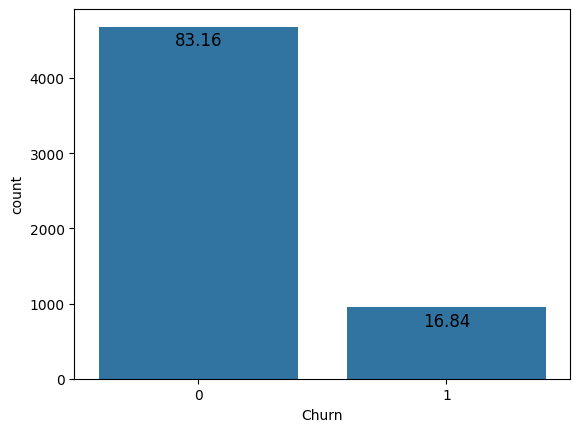

In [ ]:
#count the number of customers in the churn and not churn class
ax = sns.countplot(x='Churn', data=data)
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

There are more retained than churned customers, the ratio of retained to churned is approximately 5 to 1, so the churn rate is very low, which is normal therefore making the data imbalanced.

Distribution of the Tenure of the customers on the platform

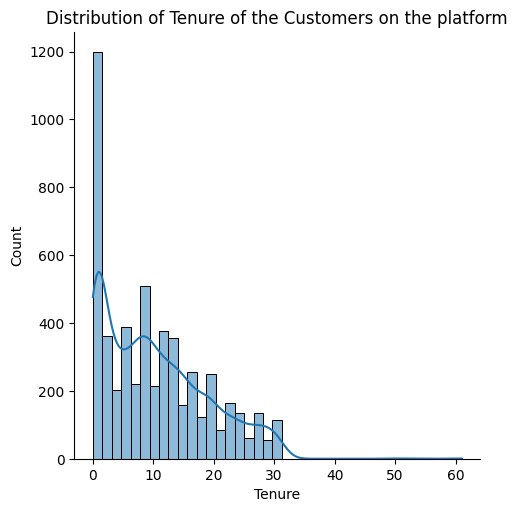

In [ ]:
sns.displot(x='Tenure', kde=True, data=data)
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()

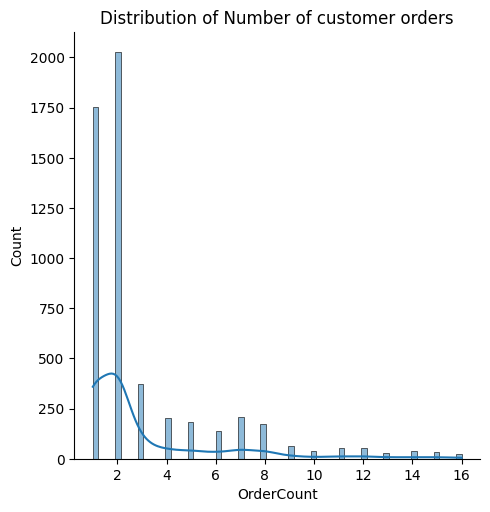

In [ ]:
#Distribution of Order Count of customers
sns.displot(x='OrderCount', kde=True, data=data)
plt.title("Distribution of Number of customer orders")
plt.show()


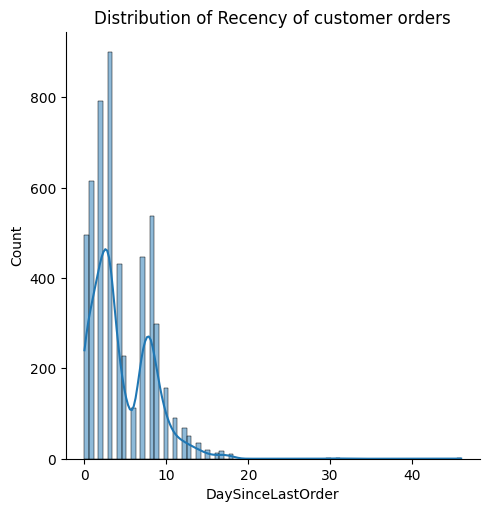

In [ ]:
#Distribution of Recency of the customers

sns.displot(x='DaySinceLastOrder', kde=True, data=data)
plt.title("Distribution of Recency of customer orders")
plt.show()

Recency is gotten from the day since last order of each customer. Customers with low number of days since last order are recent customers and vice versa

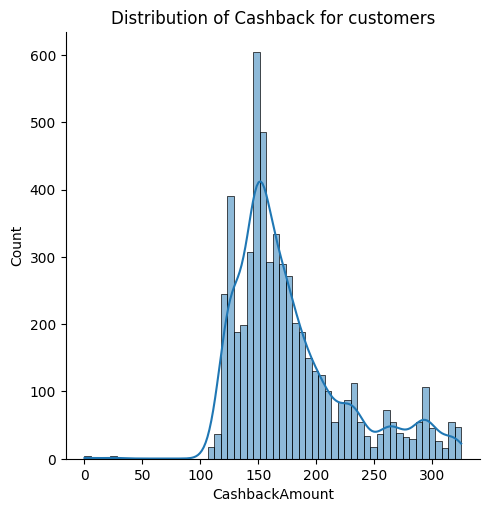

In [ ]:
# Distribution of Amount returned for money spent by customers

sns.displot(x='CashbackAmount',kde=True, data=data)
plt.title('Distribution of Cashback for customers')
plt.show()

Cashback is a reward that refunds a percentage of the money spent to by a customer to him/her, It is usually dependent on the amount spent, so the cashback column can be used in place of the amount spent columns.

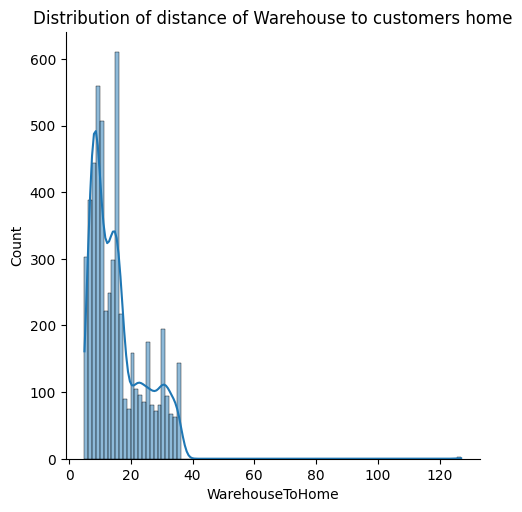

In [ ]:
#Distribution of distance of Warehouse to customers home
sns.displot(x='WarehouseToHome', kde=True, data=data)
plt.title("Distribution of distance of Warehouse to customers home")
plt.show()

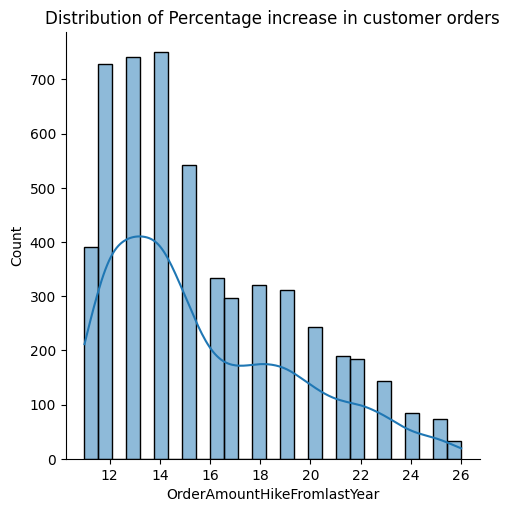

In [ ]:
# Distribution of Percentage increase in customer orders

sns.displot(x='OrderAmountHikeFromlastYear', kde=True, data=data)
plt.title("Distribution of Percentage increase in customer orders")
plt.show()

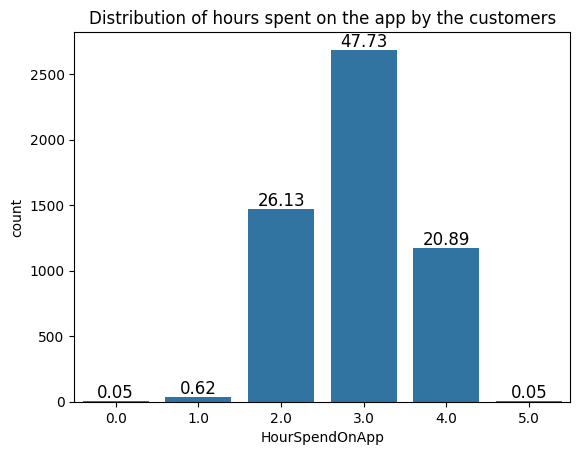

In [ ]:
# Distribution of Hours spent on the app by the customers

axx = sns.countplot(x='HourSpendOnApp', data=data)
for a in axx.patches:
    axx.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Distribution of hours spent on the app by the customers")
plt.show()

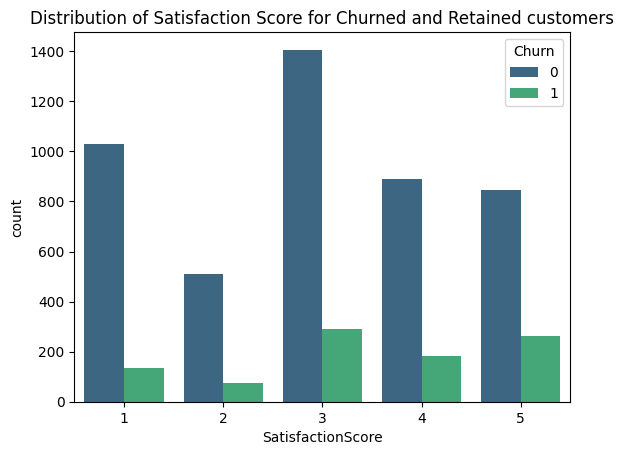

In [ ]:
# Distribution Satisfaction score for churned and retained customers

sns.countplot(x='SatisfactionScore', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()

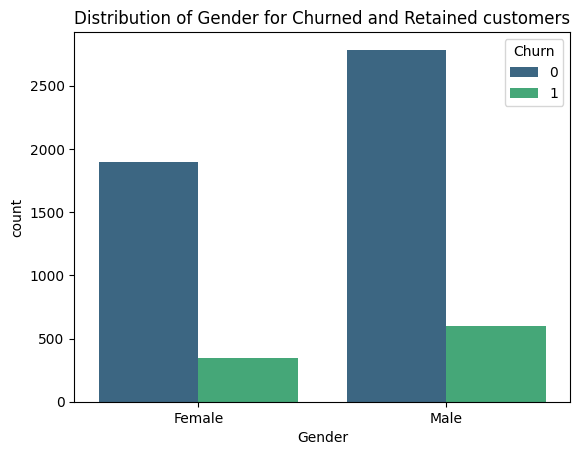

In [ ]:
### Distribution of Gender for churned and retained customers

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of Gender for Churned and Retained customers")
plt.show()

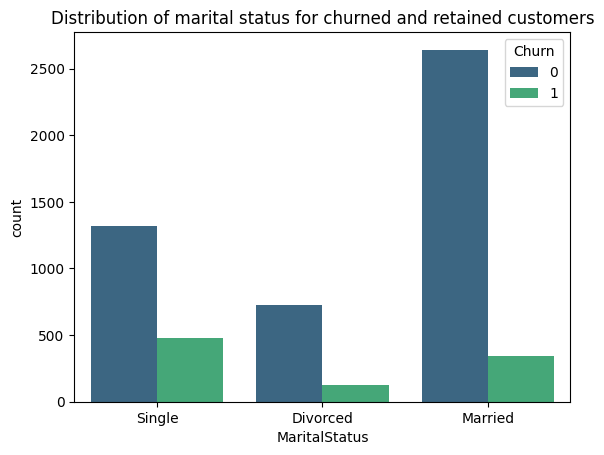

In [ ]:
### Distribution of marital status for churned and retained customers

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of marital status for churned and retained customers")
plt.show()


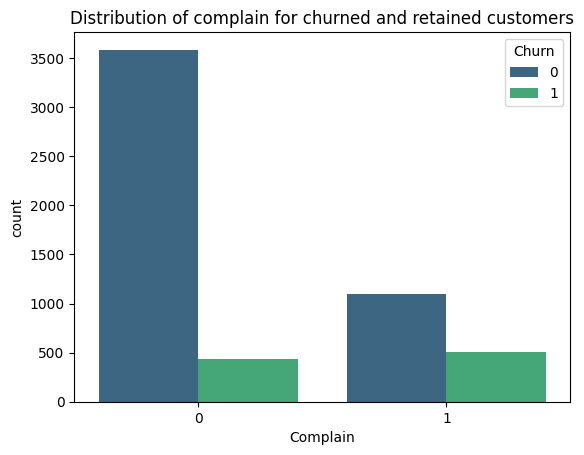

In [ ]:
### Distribution of complain for churned and retained customers

sns.countplot(x='Complain', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of complain for churned and retained customers")
plt.show()

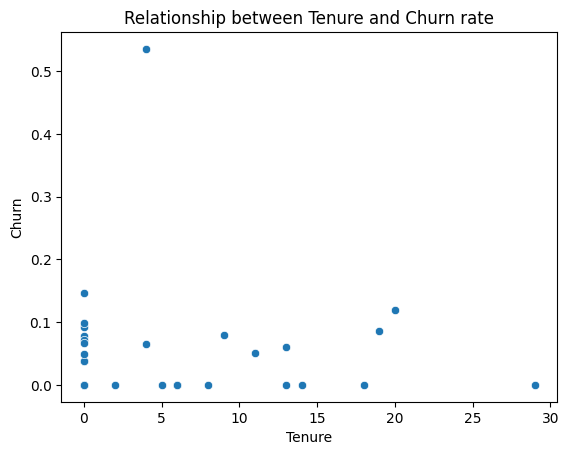

In [ ]:
### Relationship between the Tenure and Churn rate
sns.scatterplot(x=data['Tenure'],y=data.groupby('Tenure').Churn.mean())
plt.title("Relationship between Tenure and Churn rate")
plt.show()

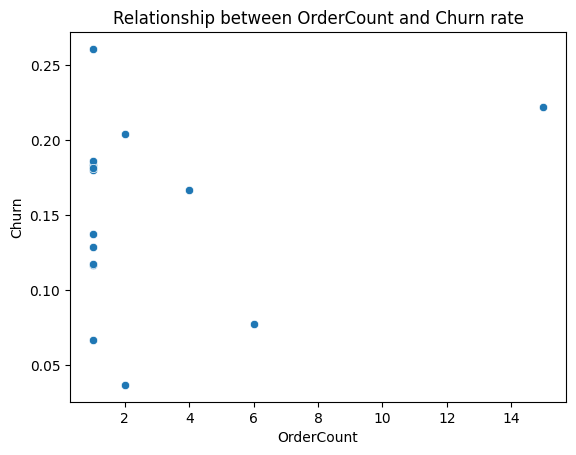

In [ ]:
### Relationship between the Order Count and Churn rate

sns.scatterplot(x=data['OrderCount'],y=data.groupby('OrderCount').Churn.mean())
plt.title("Relationship between OrderCount and Churn rate")
plt.show()

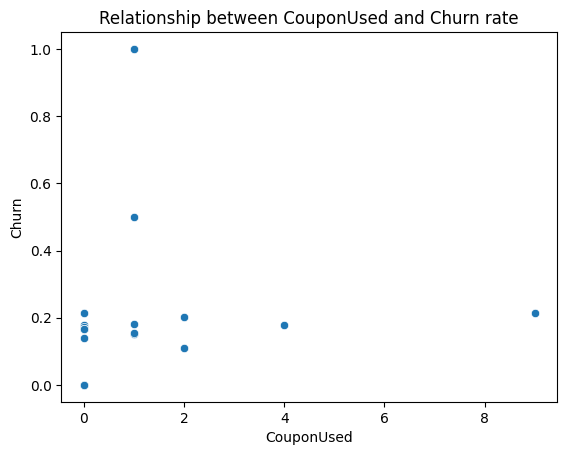

In [ ]:
### Relationship between the Coupon Used and Churn rate

sns.scatterplot(x=data['CouponUsed'],y=data.groupby('CouponUsed').Churn.mean())
plt.title("Relationship between CouponUsed and Churn rate")
plt.show()

Findings
From the Analysis;

The Tenure, Days since last order, cashback amount, and warehouse to home features have outliers, but the outliers don't have huge impact on tree models, which will be my final model so I will keep them.
Most of the customers spend 3 hours on the app, and 94.75% of the customers spend between 2 and 4 hours on the app
Single people have higher churn rate than other Marital Status
Customers with complain have higher churn rate than customers without complain
From the scatterplot there is a relationship between tenure and the churn rate as there is a churn rate of 0.5 between 4 and 5 Tenure

Data Preprocessing
The preprocessing involves encoding categorical variables, imputing missing values, and scaling the data. But those steps will be done in pipelines, and will not be under this section.


Missing Value Treatment
I will use the missingno package to visualize the missing value and understanding the missingness type, which will help in selecting the method for handling the missing values. Although the missing values would not be handled in this section, but the handler would be put in a pipeline in the model development section to avoid data leakage

In [ ]:
#count the number of missing values across each columns
data.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
#count the total number of missing values in the dataset
print(f'The number of missing values: {data.isnull().sum().sum()}')
#count the number of rows with missing values
print(f'The number of rows with missing values: {data[data.isnull().any(axis=1)].shape[0]}')

The number of missing values: 1856
The number of rows with missing values: 1856


In total there are 1856 missing values, and there are also 1856 rows with missing values, meaning that each of the missing value is on a different row, and no row has more than one missing value.

So if we drop all the rows with missing values we would be dropping 1856 rows that is 32.97 percent of the dataset and will cause a data loss

In [ ]:
#description of data
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Plot the missing values in all columns, using missingness matrix

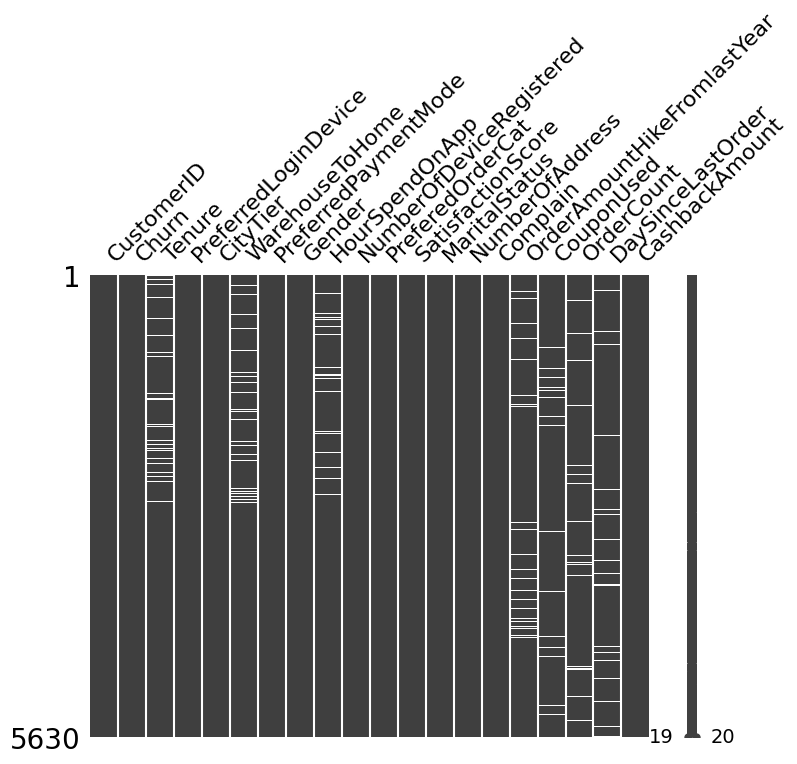

In [ ]:
#plot the missingness matrix
msno.matrix(data, figsize=(8,6))
plt.show()

Identifying missingness type by Identifying relationship between missing values and observed value
Looking at the missingness matrix above the missing values do not follow any pattern, they are missing completely at random(MCAR), I will sort the data to uncover some relationship between missingness type.

After sorting the data by all the columns, I found that sorting by the CashbackAmount columns creates a pattern between the missing values and the CashbackAmount columns, which identifies the missingness as missing at random(MAR)

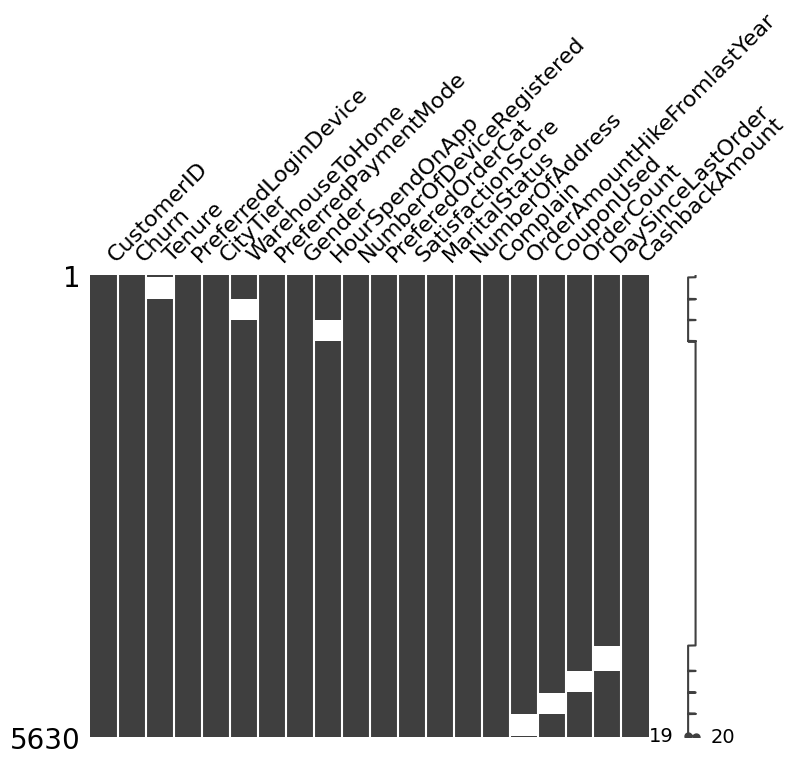

In [ ]:
#plot the missingness matrix of sorted data
msno.matrix(data.sort_values(by='CashbackAmount'), figsize=(8,6))
plt.show()

Identifying relationships between missing values in columns

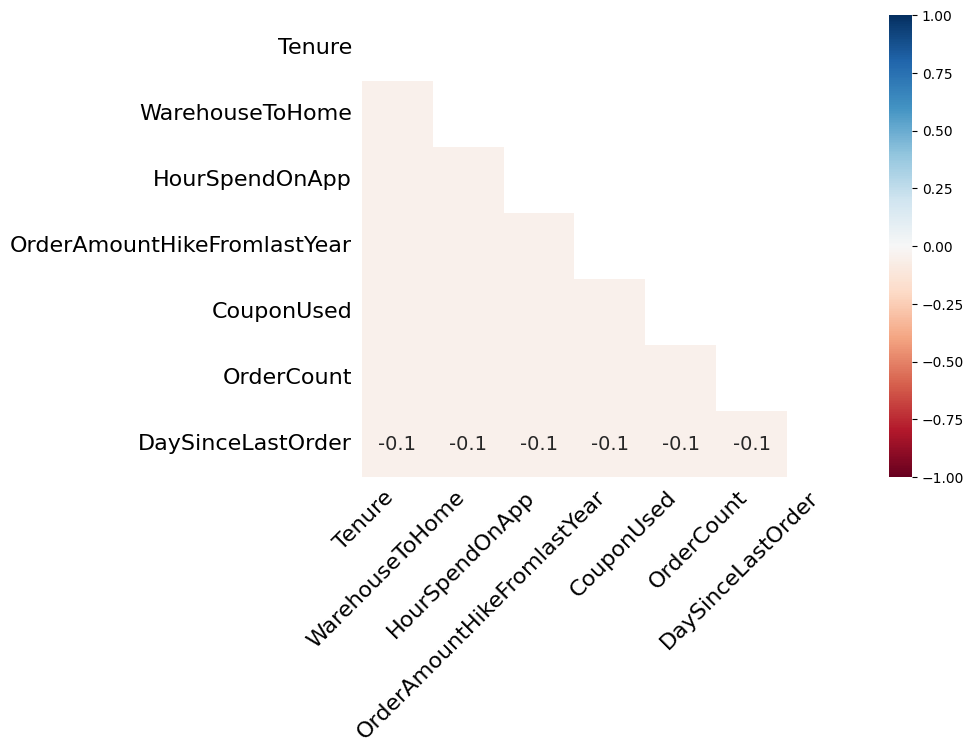

In [ ]:
#plot heatmap of missing values
msno.heatmap(data,figsize=(8,6))
plt.show()

Handling the missing values
Since the missingness is MAR, and the missing values are much, I will impute the missing values instead of dropping the missing value rows or columns.

For imputing the missing values, I will use the fancyimpute library, and use the IterativeImputer class to impute the missing values. The imputation will be done in a pipeline in the model selection section

Categorical Encoding
Here I will encode the categorical variables as numeric variables, since machine learning algorithms work on numbers and not text. I will use the pandas get_dummies function which applies one-hot encoding to all the variables passed to it.

In [ ]:
cat_data = data.select_dtypes(include='object')
cat_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [ ]:
# encode categorical variables and add it to the normal dataset
encoded = pd.get_dummies(cat_data,drop_first=True)

data_enc = pd.concat([data.drop(cat_data.columns, axis=1), encoded], axis=1)
data_enc.drop('CustomerID', axis=1,inplace=True)

Model Development
Data Splitting:

I will split the dataset into training, validation, and testing sets to ensure robust evaluation and minimize overfitting.
Model Pipelines:

I will create pipelines for preprocessing steps (e.g., scaling, encoding) and train the following models:
DecisionTreeClassifier (Tree-based classifier).
KNeighborsClassifier (Distance-based classifier).
GradientBoostingClassifier (Ensemble-based classifier).
CNN and RNN (Deep learning models for sequential and structured data).
Cross-Validation:

I will perform cross-validation on the training samples to evaluate model performance and compare models.
Model Evaluation:

I will evaluate the models on the testing set using metrics like accuracy, precision, recall, F1 score, and ROC-AUC.
Hyperparameter Tuning:

I will tune hyperparameters of the best-performing model using grid search or Bayesian optimization.

In [ ]:

# -------------------------------
# Data Preparation
# -------------------------------

# Split data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]), categorical_features)
    ])

# -------------------------------
# Define Models and Tracking
# -------------------------------

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
}

# Variables to store results
best_model = None
best_model_name = None
best_mcc = -1.0

results = []

# -------------------------------
# Model Training and Evaluation
# -------------------------------

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Cross-validation score
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    cv_mean_accuracy = cv_scores.mean()

    # Measure training time
    start_train = time.time()
    pipeline.fit(X_train, y_train)
    end_train = time.time()
    train_time = end_train - start_train

    # Measure prediction time
    start_pred = time.time()
    y_pred = pipeline.predict(X_test)
    end_pred = time.time()
    pred_time = end_pred - start_pred

    # Evaluate performance
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)
    test_mcc = matthews_corrcoef(y_test, y_pred)

    print(f"{name} - CV Mean Accuracy: {cv_mean_accuracy:.4f}")
    print(f"{name} - Test Accuracy: {test_accuracy:.4f}")
    print(f"{name} - F1 Score: {test_f1:.4f}")
    print(f"{name} - MCC: {test_mcc:.4f}")
    print(f"{name} - Train Time: {train_time:.4f}s | Predict Time: {pred_time:.4f}s\n")

    # Track best model
    if test_mcc > best_mcc:
        best_mcc = test_mcc
        best_model = pipeline
        best_model_name = name

    # Store result
    results.append({
        "Model": name,
        "CV Mean Accuracy": cv_mean_accuracy,
        "Test Accuracy": test_accuracy,
        "F1 Score": test_f1,
        "MCC": test_mcc,
        "Training Time (s)": train_time,
        "Prediction Time (s)": pred_time
    })

# -------------------------------
# Save Best Model
# -------------------------------

print(f"Best performing model: {best_model_name} with MCC: {best_mcc:.4f}")
joblib.dump(best_model, 'best_model.joblib')
print("Model saved as 'best_model.joblib'.")

# -------------------------------
# Save Results as DataFrame
# -------------------------------

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="MCC", ascending=False)
results_df.to_csv("model_performance_with_time.csv", index=False)

print("\nSummary Table:")
print(results_df)


Decision Tree - CV Mean Accuracy: 0.9218
Decision Tree - Test Accuracy: 0.9591
Decision Tree - F1 Score: 0.8814
Decision Tree - MCC: 0.8570
Decision Tree - Train Time: 0.0606s | Predict Time: 0.0089s

K-Neighbors - CV Mean Accuracy: 0.8923
K-Neighbors - Test Accuracy: 0.9023
K-Neighbors - F1 Score: 0.6584
K-Neighbors - MCC: 0.6172
K-Neighbors - Train Time: 0.0222s | Predict Time: 0.0428s

Gradient Boosting - CV Mean Accuracy: 0.9130
Gradient Boosting - Test Accuracy: 0.9147
Gradient Boosting - F1 Score: 0.7176
Gradient Boosting - MCC: 0.6747
Gradient Boosting - Train Time: 1.2641s | Predict Time: 0.0108s

SVM - CV Mean Accuracy: 0.9079
SVM - Test Accuracy: 0.9103
SVM - F1 Score: 0.6622
SVM - MCC: 0.6464
SVM - Train Time: 2.2719s | Predict Time: 0.4771s

Random Forest - CV Mean Accuracy: 0.9405
Random Forest - Test Accuracy: 0.9627
Random Forest - F1 Score: 0.8786
Random Forest - MCC: 0.8626
Random Forest - Train Time: 0.6412s | Predict Time: 0.0293s

AdaBoost - CV Mean Accuracy: 0.8948

In [ ]:
# --------------------------------
# Preprocessing
# --------------------------------

# Apply Preprocessor to Training and Test Data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to arrays and reshape for Conv1D input
X_train_array = X_train_processed.astype(float).reshape(-1, X_train_processed.shape[1], 1)
X_test_array = X_test_processed.astype(float).reshape(-1, X_test_processed.shape[1], 1)
y_train_array = y_train.values.astype(float)
y_test_array = y_test.values.astype(float)

# --------------------------------
# Define CNN Model
# --------------------------------

input_shape = X_train_array.shape[1:]
cnn_model = Sequential([
    Input(shape=input_shape),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --------------------------------
# Measure Training Time
# --------------------------------

start_train = time.time()
cnn_model.fit(X_train_array, y_train_array, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
end_train = time.time()
cnn_train_time = end_train - start_train

# --------------------------------
# Measure Prediction Time and Evaluate
# --------------------------------

start_pred = time.time()
y_pred_probs = cnn_model.predict(X_test_array)
end_pred = time.time()
cnn_pred_time = end_pred - start_pred

y_pred = (y_pred_probs > 0.5).astype(int)

cnn_accuracy = accuracy_score(y_test_array, y_pred)
cnn_f1 = f1_score(y_test_array, y_pred)
cnn_mcc = matthews_corrcoef(y_test_array, y_pred)

print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")
print(f"CNN F1 Score: {cnn_f1:.4f}")
print(f"CNN MCC: {cnn_mcc:.4f}")
print(f"CNN Training Time: {cnn_train_time:.4f} seconds")
print(f"CNN Prediction Time: {cnn_pred_time:.4f} seconds")

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8371 - loss: 0.4035 - val_accuracy: 0.8524 - val_loss: 0.3267
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8865 - loss: 0.2965 - val_accuracy: 0.8846 - val_loss: 0.2868
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8964 - loss: 0.2689 - val_accuracy: 0.8635 - val_loss: 0.3260
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9017 - loss: 0.2571 - val_accuracy: 0.8912 - val_loss: 0.2836
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8923 - loss: 0.2537 - val_accuracy: 0.8890 - val_loss: 0.2772
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9095 - loss: 0.2406 - val_accuracy: 0.8857 - val_loss: 0.2982
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9178 - loss: 0.2112 - val_accuracy: 0.8812 - val_loss: 0.2870
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9168 - loss: 0.2135 - val_accuracy: 0

In [ ]:

# --------------------------------
# Define LSTM Model
# --------------------------------

lstm_model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train_array.shape[1], 1), return_sequences=True),
    Dropout(0.5),
    LSTM(32, activation='tanh', return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --------------------------------
# Measure Training Time
# --------------------------------

start_train = time.time()
lstm_model.fit(X_train_array, y_train_array, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
end_train = time.time()
lstm_train_time = end_train - start_train

# --------------------------------
# Measure Prediction Time and Evaluate
# --------------------------------

start_pred = time.time()
y_pred_probs = lstm_model.predict(X_test_array)
end_pred = time.time()
lstm_pred_time = end_pred - start_pred

y_pred = (y_pred_probs > 0.5).astype(int)

lstm_accuracy = accuracy_score(y_test_array, y_pred)
lstm_f1 = f1_score(y_test_array, y_pred)
lstm_mcc = matthews_corrcoef(y_test_array, y_pred)

print(f"LSTM Test Accuracy: {lstm_accuracy:.4f}")
print(f"LSTM F1 Score: {lstm_f1:.4f}")
print(f"LSTM MCC: {lstm_mcc:.4f}")
print(f"LSTM Training Time: {lstm_train_time:.4f} seconds")
print(f"LSTM Prediction Time: {lstm_pred_time:.4f} seconds")

# --------------------------------
# Optional: Store as dictionary for appending to results
# --------------------------------

lstm_results = {
    "Model": "LSTM",
    "Test Accuracy": lstm_accuracy,
    "F1 Score": lstm_f1,
    "MCC": lstm_mcc,
    "Training Time (s)": lstm_train_time,
    "Prediction Time (s)": lstm_pred_time
}


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.8225 - loss: 0.5332 - val_accuracy: 0.8180 - val_loss: 0.4698
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8270 - loss: 0.4748 - val_accuracy: 0.8180 - val_loss: 0.4646
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8325 - loss: 0.4599 - val_accuracy: 0.8180 - val_loss: 0.4528
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8401 - loss: 0.4313 - val_accuracy: 0.8180 - val_loss: 0.4386
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8287 - loss: 0.4400 - val_accuracy: 0.8180 - val_loss: 0.4324
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8347 - loss: 0.4111 - val_accuracy: 0.8180 - val_loss: 0.4063
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8374 - loss: 0.4153 - val_accuracy: 0.8302 - val_loss: 0.4038
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8402 - loss: 0.3989 - val_accu

In [ ]:
#Paired t-test Preparation (XGBoost vs LightGBM)


#Evaluate Models (Accuracy, F1, MCC per Fold)

# Define scorers
f1_scorer = make_scorer(f1_score)
mcc_scorer = make_scorer(matthews_corrcoef)
acc_scorer = make_scorer(accuracy_score)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models to compare
top_models = {
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Store scores
accuracy_scores = {}
f1_scores = {}
mcc_scores = {}

# Run cross-validation
for name, model in top_models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    print(f"\nEvaluating: {name}")

    scores = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring={
            'accuracy': acc_scorer,
            'f1': f1_scorer,
            'mcc': mcc_scorer
        },
        return_train_score=False
    )

    accuracy_scores[name] = scores['test_accuracy']
    f1_scores[name] = scores['test_f1']
    mcc_scores[name] = scores['test_mcc']

    print(f"{name} - Accuracy per fold: {accuracy_scores[name]}")
    print(f"{name} - F1 Score per fold: {f1_scores[name]}")
    print(f"{name} - MCC per fold: {mcc_scores[name]}")




Evaluating: XGBoost
XGBoost - Accuracy per fold: [0.95338513 0.95560488 0.94783574 0.95449501 0.94555556]
XGBoost - F1 Score per fold: [0.85714286 0.86206897 0.82656827 0.85409253 0.82562278]
XGBoost - MCC per fold: [0.82975467 0.83707277 0.80466783 0.83125821 0.79670173]

Evaluating: LightGBM
[LightGBM] [Info] Number of positive: 607, number of negative: 2996
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 3603, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168471 -> initscore=-1.596505
[LightGBM] [Info] Start training from score -1.596505
[LightGBM] [Info] Number of positive: 606, number of negative: 2997
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

In [ ]:

# Accuracy
t_stat_acc, p_val_acc = ttest_rel(accuracy_scores["XGBoost"], accuracy_scores["LightGBM"])
print(f"\nPaired t-test for Accuracy: t={t_stat_acc:.4f}, p-value={p_val_acc:.6f}")

# F1 Score
t_stat_f1, p_val_f1 = ttest_rel(f1_scores["XGBoost"], f1_scores["LightGBM"])
print(f"Paired t-test for F1 Score: t={t_stat_f1:.4f}, p-value={p_val_f1:.6f}")

# MCC
t_stat_mcc, p_val_mcc = ttest_rel(mcc_scores["XGBoost"], mcc_scores["LightGBM"])
print(f"Paired t-test for MCC: t={t_stat_mcc:.4f}, p-value={p_val_mcc:.6f}")



Paired t-test for Accuracy: t=2.7637, p-value=0.050657
Paired t-test for F1 Score: t=3.6405, p-value=0.021956
Paired t-test for MCC: t=3.0026, p-value=0.039838
